In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anasmohammedtahir/covidqu")

print("Path to dataset files:", path)

100%|██████████| 1.15G/1.15G [00:53<00:00, 23.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch

In [ ]:
print(os.listdir(path))

['Infection Segmentation Data', 'Lung Segmentation Data', 'COVID-QU-Ex dataset.txt']


In [ ]:
for root,dir,files in os.walk(path):
  print(root,"->",len(files))

/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7 -> 1
/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data -> 0
/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data -> 0
/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data/Val -> 0
/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data/Val/Non-COVID -> 0
/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data/Val/Non-COVID/lung masks -> 233
/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data/Val/Non-COVID/images -> 233
/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection

In [ ]:
import os

print("Infection Segmentation:")
base = os.path.join(path, "Infection Segmentation Data", "Infection Segmentation Data")

splits = ["Train", "Val", "Test"]
classes = ["COVID-19", "Normal", "Non-COVID"]

infection_total = 0
for split in splits:
    print(f"\n{split} split:")
    split_total = 0
    for cls in classes:
        img_dir = os.path.join(base, split, cls, "images")
        lung_dir = os.path.join(base, split, cls, "lung masks")
        inf_dir  = os.path.join(base, split, cls, "infection masks")

        img_count = len(os.listdir(img_dir))
        lung_count = len(os.listdir(lung_dir))
        inf_count = len(os.listdir(inf_dir))

        print(f"  {cls}: {img_count} images, {lung_count} lung masks, {inf_count} infection masks")


        if not (img_count == lung_count == inf_count):
            print(f" Warning: mismatch in counts for {cls} {split}")

        split_total += img_count
    print(f"  {split} Total: {split_total}")
    infection_total += split_total

print(f"\nInfection Total: {infection_total}")


print("\nLung Segmentation:")
base = os.path.join(path, "Lung Segmentation Data", "Lung Segmentation Data")

lung_total = 0
for split in splits:
    print(f"\n{split} split:")
    split_total = 0
    for cls in classes:
        img_dir = os.path.join(base, split, cls, "images")
        mask_dir = os.path.join(base, split, cls, "lung masks")

        img_count = len(os.listdir(img_dir))
        mask_count = len(os.listdir(mask_dir))

        print(f"  {cls}: {img_count} images, {mask_count} lung masks")

        if img_count != mask_count:
            print(f"Warning: mismatch in counts for {cls} {split}")

        split_total += img_count
    print(f"  {split} Total: {split_total}")
    lung_total += split_total

print(f"\nLung Total: {lung_total}")


Infection Segmentation:

Train split:
  COVID-19: 1864 images, 1864 lung masks, 1864 infection masks
  Normal: 932 images, 932 lung masks, 932 infection masks
  Non-COVID: 932 images, 932 lung masks, 932 infection masks
  Train Total: 3728

Val split:
  COVID-19: 466 images, 466 lung masks, 466 infection masks
  Normal: 233 images, 233 lung masks, 233 infection masks
  Non-COVID: 233 images, 233 lung masks, 233 infection masks
  Val Total: 932

Test split:
  COVID-19: 583 images, 583 lung masks, 583 infection masks
  Normal: 291 images, 291 lung masks, 291 infection masks
  Non-COVID: 292 images, 292 lung masks, 292 infection masks
  Test Total: 1166

Infection Total: 5826

Lung Segmentation:

Train split:
  COVID-19: 7658 images, 7658 lung masks
  Normal: 6849 images, 6849 lung masks
  Non-COVID: 7208 images, 7208 lung masks
  Train Total: 21715

Val split:
  COVID-19: 1903 images, 1903 lung masks
  Normal: 1712 images, 1712 lung masks
  Non-COVID: 1802 images, 1802 lung masks
  Val T

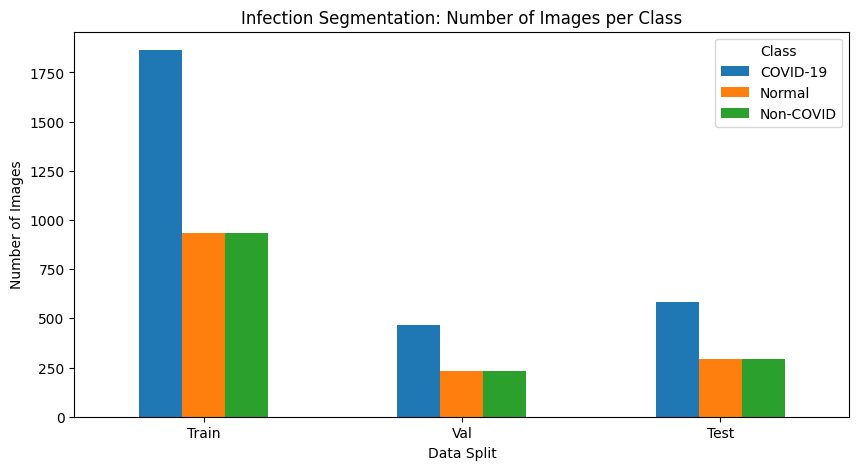

In [ ]:
splits = ['Train', 'Val', 'Test']
infection_counts = {
    'COVID-19': [1864, 466, 583],
    'Normal': [932, 233, 291],
    'Non-COVID': [932, 233, 292]
}

df_infection = pd.DataFrame(infection_counts, index=splits)

# Plot
df_infection.plot(kind='bar', figsize=(10,5))
plt.title('Infection Segmentation: Number of Images per Class')
plt.xlabel('Data Split')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)
plt.legend(title='Class')
plt.show()

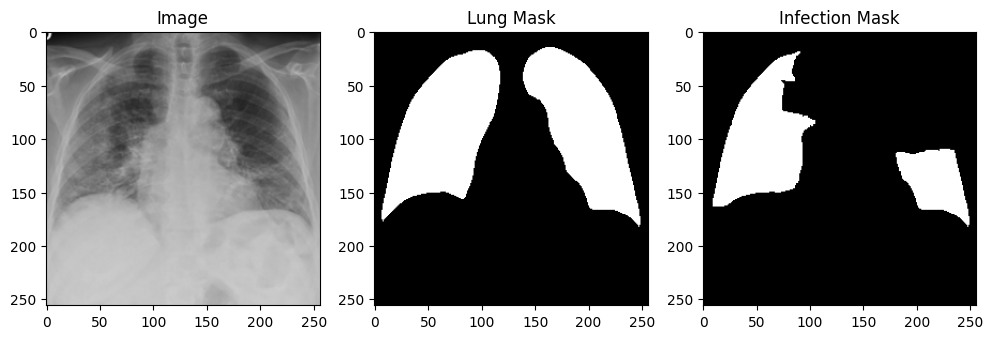

In [ ]:
import cv2
import random

split = "Train"
cls = "COVID-19"

img_dir = os.path.join(path, "Infection Segmentation Data", "Infection Segmentation Data", split, cls, "images")
mask_dir = os.path.join(path, "Infection Segmentation Data", "Infection Segmentation Data", split, cls, "lung masks")
infection_dir = os.path.join(path, "Infection Segmentation Data", "Infection Segmentation Data", split, cls, "infection masks")

sample_file = random.choice(os.listdir(img_dir))

img = cv2.imread(os.path.join(img_dir, sample_file))
lung_mask = cv2.imread(os.path.join(mask_dir, sample_file))
infection_mask = cv2.imread(os.path.join(infection_dir, sample_file))

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Image")
plt.subplot(1,3,2); plt.imshow(lung_mask, cmap="gray"); plt.title("Lung Mask")
plt.subplot(1,3,3); plt.imshow(infection_mask, cmap="gray"); plt.title("Infection Mask")
plt.show()

In [ ]:
shapes = []
for f in os.listdir(img_dir):
    img_path = os.path.join(img_dir, f)
    img = cv2.imread(img_path)
    if img is not None:
        shapes.append(img.shape)
    else:
        print("Could not read:", f)

print("Unique shapes read:", set(shapes))


Unique shapes read: {(256, 256, 3)}


In [ ]:
import os
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
import numpy as np

class InfectionSegmentationDataset(Dataset):
    def __init__(self, root_dir, transform=None, mask_transform=None):
        # ONLY these two classes now
        self.classes = ["COVID-19", "Normal"]

        self.samples = []
        self.transform = transform
        self.mask_transform = mask_transform

        for cls in self.classes:
            img_dir = os.path.join(root_dir, cls, "images")
            mask_dir = os.path.join(root_dir, cls, "infection masks")

            if not os.path.exists(img_dir):
                continue

            for img_name in os.listdir(img_dir):
                img_path = os.path.join(img_dir, img_name)

                # Normal class masks will be blank masks
                mask_path = os.path.join(mask_dir, img_name)
                if not os.path.exists(mask_path):
                    # Create a fake mask path placeholder for Normal
                    mask_path = None

                self.samples.append((img_path, mask_path, cls))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, mask_path, cls = self.samples[idx]

        image = Image.open(img_path).convert("RGB")


        if mask_path is None:
            mask = Image.new("L", image.size, 0)
        else:
            mask = Image.open(mask_path).convert("L")


        if self.transform:
            image = self.transform(image)
        if self.mask_transform:
            mask = self.mask_transform(mask)

        # Binary conversion: COVID=1, Normal=0
        mask = (mask > 0.5).float()

        return image, mask


In [ ]:
img_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

mask_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


In [ ]:
base_path = "/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data"

In [ ]:
train_data = InfectionSegmentationDataset(os.path.join(base_path, "Train"), img_transform, mask_transform)
val_data   = InfectionSegmentationDataset(os.path.join(base_path, "Val"), img_transform, mask_transform)
test_data  = InfectionSegmentationDataset(os.path.join(base_path, "Test"), img_transform, mask_transform)

In [ ]:
print(os.path.join(base_path, "Train"))

/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data/Train


In [ ]:
print(len(train_data), len(val_data), len(test_data))


2796 699 874


In [ ]:
from torch.utils.data import WeightedRandomSampler

class_counts = [1864, 932]  # COVID, Normal
class_weights = [1.0/c for c in class_counts]

sample_weights = []

for img_path, mask_path, cls in train_data.samples:
    if cls == "COVID-19":
        sample_weights.append(class_weights[0])
    elif cls == "Normal":
        sample_weights.append(class_weights[1])


In [ ]:
sampler = WeightedRandomSampler(
    weights = sample_weights,
    num_samples=len(sample_weights),
    replacement=True
)

In [ ]:
import torch.utils.data as Data

train_loader = Data.DataLoader(
    train_data,
    batch_size=16,
    sampler=sampler,
    num_workers=2
)

val_loader = Data.DataLoader(val_data, batch_size=16, shuffle=False, num_workers=2)
test_loader = Data.DataLoader(test_data, batch_size=16, shuffle=False, num_workers=2)

In [ ]:
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

175
44
55


In [ ]:
"""import torch.nn as nn

class_counts = [3728,932,1166]
total_samples = len(class_counts)
num_classes = len(class_counts)

class_weights = [total_samples / (num_classes*count)for count in class_counts]
class_weights = torch.tensor(class_weights,dtype=torch.float32)"""

'import torch.nn as nn\n\nclass_counts = [3728,932,1166]\ntotal_samples = len(class_counts)\nnum_classes = len(class_counts)\n\nclass_weights = [total_samples / (num_classes*count)for count in class_counts]\nclass_weights = torch.tensor(class_weights,dtype=torch.float32)'

In [ ]:
!pip install pytorch_lightning
!pip install segmentation_models_pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 6.2 MB/s eta 0:00:00


In [ ]:
"""import segmentation_models_pytorch as smp
import torch.nn as nn

class WeightedDiceBCELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.dice = smp.losses.DiceLoss(mode='binary', from_logits=True)
        self.bce = nn.BCEWithLogitsLoss()

    def forward(self, y_pred, y_true):
        return self.dice(y_pred, y_true) + self.bce(y_pred, y_true)"""


"import segmentation_models_pytorch as smp\nimport torch.nn as nn\n\nclass WeightedDiceBCELoss(nn.Module):\n    def __init__(self):\n        super().__init__()\n        self.dice = smp.losses.DiceLoss(mode='binary', from_logits=True)\n        self.bce = nn.BCEWithLogitsLoss()\n\n    def forward(self, y_pred, y_true):\n        return self.dice(y_pred, y_true) + self.bce(y_pred, y_true)"

In [ ]:
import pytorch_lightning as pl
import segmentation_models_pytorch as smp
import torch
from torch.optim import lr_scheduler

class Segmentation(pl.LightningModule):
    def __init__(self, arch, encoder_name, in_channels, out_classes, **kwargs):
        super().__init__()
        self.model = smp.create_model(
            arch,
            encoder_name=encoder_name,
            in_channels=in_channels,
            classes=out_classes,
            **kwargs
        )

        params = smp.encoders.get_preprocessing_params(encoder_name)
        self.register_buffer("std", torch.tensor(params["std"]).view(1, 3, 1, 1))
        self.register_buffer("mean", torch.tensor(params["mean"]).view(1, 3, 1, 1))

        self.number_of_classes = out_classes
        self.loss_fn = smp.losses.DiceLoss(smp.losses.BINARY_MODE, from_logits=True)


        self.training_step_outputs = []
        self.validation_step_outputs = []
        self.test_step_outputs = []

    def forward(self, images):
        images = (images - self.mean) / self.std
        return self.model(images)

    def shared_step(self, batch, stage):
        image, mask = batch

        assert image.ndim == 4
        mask = mask.long()
        assert mask.ndim == 4

        logits_mask = self.forward(image)
        assert logits_mask.shape[1] == self.number_of_classes
        logits_mask = logits_mask.contiguous()

        loss = self.loss_fn(logits_mask, mask)

        prob_mask = torch.sigmoid(logits_mask)
        pred_mask = (prob_mask > 0.5).long()


        tp, fp, fn, tn = smp.metrics.get_stats(
            pred_mask, mask.long(), mode="binary", num_classes=self.number_of_classes
        )

        return {
            "loss": loss,
            "tp": tp,
            "fp": fp,
            "fn": fn,
            "tn": tn,
        }

    def shared_epoch_end(self, outputs, stage):
        tp = torch.cat([x["tp"] for x in outputs])
        fp = torch.cat([x["fp"] for x in outputs])
        fn = torch.cat([x["fn"] for x in outputs])
        tn = torch.cat([x["tn"] for x in outputs])

        per_image_iou = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro-imagewise")
        dataset_iou = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro")

        metrics = {
            f"{stage}_per_image_iou": per_image_iou,
            f"{stage}_dataset_iou": dataset_iou,
        }

        self.log_dict(metrics, prog_bar=True)

    def training_step(self, batch, batch_idx):
        train_loss_info = self.shared_step(batch, "train")
        self.training_step_outputs.append(train_loss_info)
        return train_loss_info

    def on_train_epoch_end(self):
        self.shared_epoch_end(self.training_step_outputs, "train")
        self.training_step_outputs.clear()

    def validation_step(self, batch, batch_idx):
        valid_loss_info = self.shared_step(batch, "valid")
        self.validation_step_outputs.append(valid_loss_info)
        return valid_loss_info

    def on_validation_epoch_end(self):
        self.shared_epoch_end(self.validation_step_outputs, "valid")
        self.validation_step_outputs.clear()

    def test_step(self, batch, batch_idx):
        test_loss_info = self.shared_step(batch, "test")
        self.test_step_outputs.append(test_loss_info)
        return test_loss_info

    def on_test_epoch_end(self):
        self.shared_epoch_end(self.test_step_outputs, "test")
        self.test_step_outputs.clear()

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=2e-4)
        scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=50, eta_min=1e-5)
        return {
            "optimizer": optimizer,
            "lr_scheduler": {
                "scheduler": scheduler,
                "interval": "epoch",
                "frequency": 1,
            },
        }

In [ ]:
ARCH = "unetplusplus"        # SMP architecture name for U-Net++
ENCODER = "resnet18"         # SMP encoder backbone
IN_CHANNELS = 3              # RGB images
OUT_CLASSES = 1              # number of segmentation classes (example)
EPOCHS = 10                  # number of epochs


In [ ]:
model = Segmentation(ARCH, ENCODER, IN_CHANNELS, OUT_CLASSES)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [ ]:
trainer = pl.Trainer(max_epochs=EPOCHS, log_every_n_steps=1)

trainer.fit(
    model,
    train_dataloaders=train_loader,
    val_dataloaders=val_loader,
)

INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type         | Params | Mode 
-------------------------------------------------
0 | model   | UnetPlusPlus | 16.0 M | train
1 | loss_fn | DiceLoss     | 0      | train
-------------------------------------------------
16.0 M    Trainable params
0         Non-trainable params
16.0 M    Total params
63.882    Total estimated model params size (MB)
219       Modu

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
valid_metrics = trainer.validate(model, dataloaders=val_loader, verbose=False)
print(valid_metrics)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: |          | 0/? [00:00<?, ?it/s]

[{'valid_per_image_iou': 0.7525283694267273, 'valid_dataset_iou': 0.7454335689544678}]


In [ ]:
test_metrics = trainer.test(model, dataloaders=test_loader, verbose=False)
print(test_metrics)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

[{'test_per_image_iou': 0.7514356374740601, 'test_dataset_iou': 0.734004020690918}]


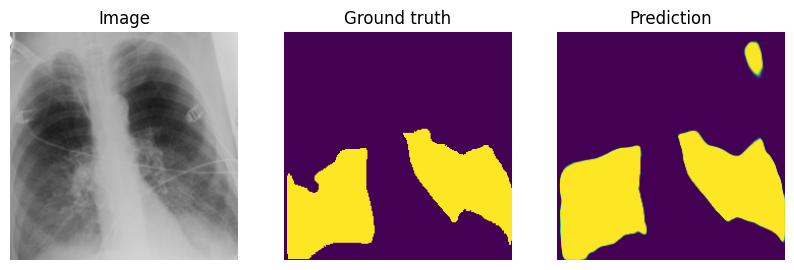

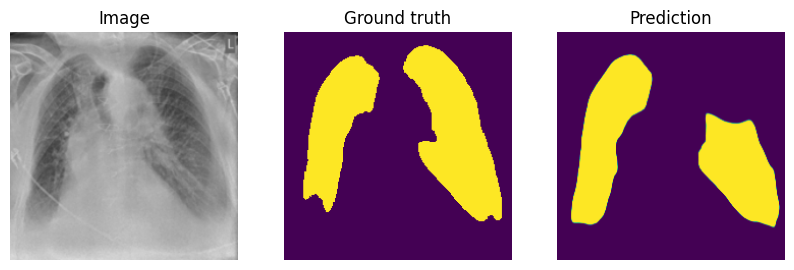

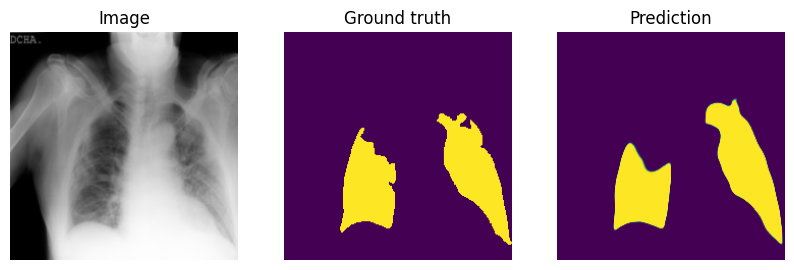

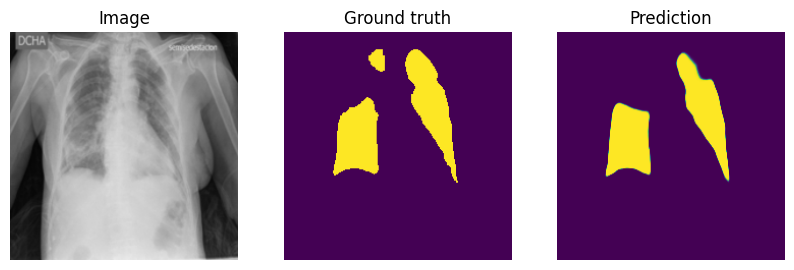

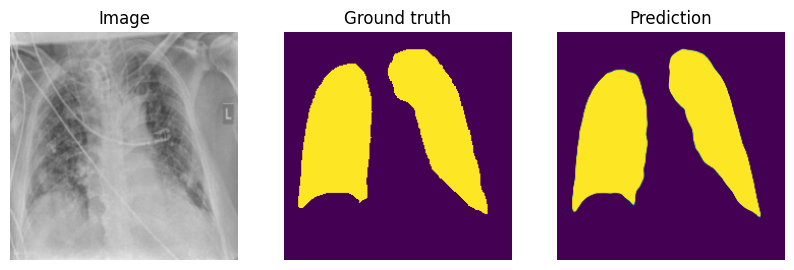

In [ ]:
batch = next(iter(test_loader))
with torch.inference_mode():
    model.eval()
    logits = model(batch[0]) # Access image by index 0
pr_masks = logits.sigmoid()
for idx, (image, gt_mask, pr_mask) in enumerate(
    zip(batch[0], batch[1], pr_masks) # Access image by index 0 and mask by index 1
):
    if idx <= 4:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(image.numpy().transpose(1, 2, 0))
        plt.title("Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(gt_mask.numpy().squeeze())
        plt.title("Ground truth")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(pr_mask.numpy().squeeze())
        plt.title("Prediction")
        plt.axis("off")
        plt.show()
    else:
        break

In [ ]:
from sklearn.metrics import classification_report

IOU_THRESHOLD = 0.5
y_true, y_pred = [], []

model.eval()
with torch.no_grad():
    for images, masks in test_loader:
        logits = model(images)
        preds = (torch.sigmoid(logits) > 0.5).long()

        for gt, pr in zip(masks, preds):
            gt = gt.squeeze()
            pr = pr.squeeze()

            gt_has_mask = gt.sum().item() > 0
            pr_has_mask = pr.sum().item() > 0

            # Compute IoU if both present
            if gt_has_mask and pr_has_mask:
                intersection = ((gt==1) & (pr==1)).sum().item()
                union = ((gt==1) | (pr==1)).sum().item()
                iou = intersection / union if union > 0 else 0

                y_true.append(1)  # ground truth infection present
                y_pred.append(1 if iou >= IOU_THRESHOLD else 0)

            elif gt_has_mask and not pr_has_mask:
                y_true.append(1)
                y_pred.append(0)

            elif not gt_has_mask and pr_has_mask:
                y_true.append(0)
                y_pred.append(1)

            else:
                y_true.append(0)
                y_pred.append(0)

print(classification_report(y_true, y_pred, target_names=["Normal", "COVID"]))


              precision    recall  f1-score   support

      Normal       0.66      0.96      0.79       291
       COVID       0.98      0.76      0.85       583

    accuracy                           0.82       874
   macro avg       0.82      0.86      0.82       874
weighted avg       0.87      0.82      0.83       874



In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
smp_model = model.model
# if push_to_hub=True, model will be saved to repository with this name
commit_info = smp_model.save_pretrained(
    save_directory="saketpatayeet/infection-segmentation",
    push_to_hub=True,  # optional, push model to HF Hub
    metrics=test_metrics,  # optional, save metrics in model card
    dataset="Infection Segmentation",  # optional, save dataset name in model card
)

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...ntation/model.safetensors:   1%|          |  562kB / 64.0MB            

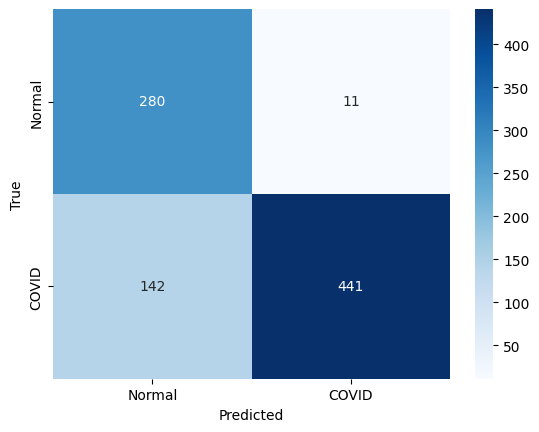

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'COVID'], yticklabels=['Normal', 'COVID'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import random
import torch
import matplotlib.pyplot as plt
import numpy as np

def visualize_random_predictions(model, dataloader, num_samples=4):
    model.eval()

    # pick random indices
    indices = random.sample(range(len(dataloader.dataset)), num_samples)

    for idx in indices:
        image, gt_mask = dataloader.dataset[idx]

        # add batch dimension & move to device
        img_tensor = image.unsqueeze(0).to(next(model.parameters()).device)

        with torch.no_grad():
            logits = model(img_tensor)
            pred_prob = torch.sigmoid(logits)
            pred_mask = (pred_prob > 0.5).cpu().squeeze().numpy()

        # convert image to display format
        img = image.cpu().numpy().transpose(1, 2, 0)
        img = (img - img.min()) / (img.max())  # normalize for display

        gt_mask = gt_mask.cpu().numpy().squeeze()

        # Create overlay
        overlay = img.copy()
        overlay[..., 0] = np.maximum(overlay[..., 0], pred_mask)  # red channel highlight

        # Plot
        plt.figure(figsize=(10,4))

        plt.subplot(1, 4, 1)
        plt.imshow(img, cmap="gray")
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 4, 2)
        plt.imshow(gt_mask, cmap="gray")
        plt.title("GT Mask")
        plt.axis("off")

        plt.subplot(1, 4, 3)
        plt.imshow(pred_mask, cmap="gray")
        plt.title("Pred Mask")
        plt.axis("off")

        plt.subplot(1, 4, 4)
        plt.imshow(overlay)
        plt.title("Overlay (Red = Pred)")
        plt.axis("off")

        plt.show()


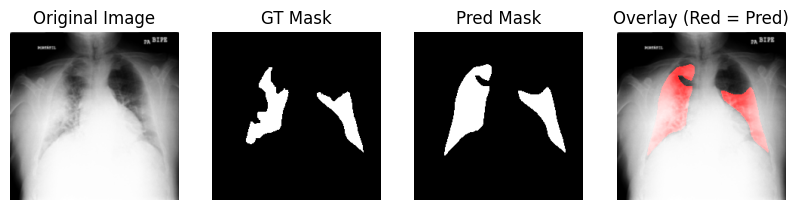

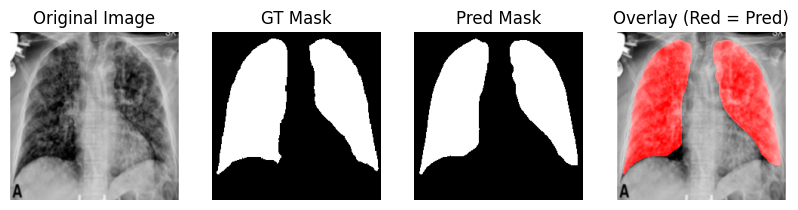

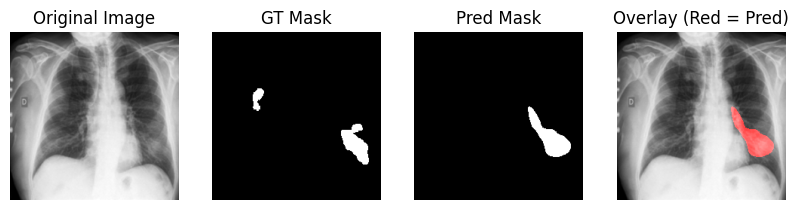

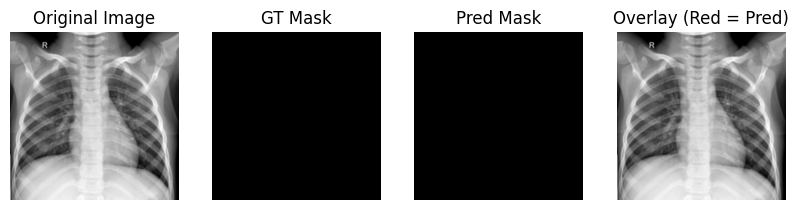

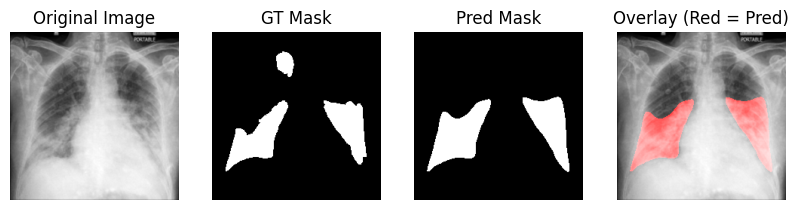

In [ ]:
visualize_random_predictions(model, test_loader, num_samples=5)


0.9524447319238304


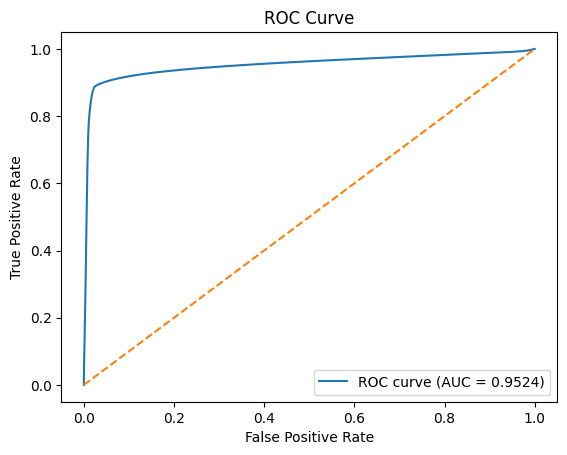

In [ ]:
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt

model.eval()
all_labels = []
all_preds = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

with torch.no_grad():
  for images,labels in test_loader:
    images,labels = images.to(device),labels.to(device)
    logits = model(images)
    preds = torch.sigmoid(logits)
    all_labels.extend(labels.cpu().numpy())
    all_preds.extend(preds.cpu().numpy())


all_labels_flat = np.concatenate(all_labels).ravel()
all_preds_flat = np.concatenate(all_preds).ravel()


fpr,tpr,thresholds = roc_curve(all_labels_flat,all_preds_flat)
roc_auc = auc(fpr,tpr)

print(roc_auc)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()